# Seattle Data Analysis Journey of Airbnb Data

![title](seattle.jpg)

**Project Motivation:** I am still planning a trip to visit Seattle, maybe in 2023. Therefore I am going to start a seattle data analysis journey of available airbnb data to find an appropriate location. An appropriate location for me should be cheap and should meet the promising expectations. Therefore, in a first step I try to find the top 5 cheapest area's in seattle for a stay and in a second step I try to find a specific location with the best price-rating-ratio within the top 5 cheapest area's. The price-rating-ratio reflects the requirement to a location to meet the promising expectations. Last but not least I am interesting in what the top 5 influencing factors of price-rating-ratio are?

**Dataset:** The used dataset can be found on https://www.kaggle.com/datasets/airbnb/seattle?select=reviews.csv

**Methodology:** I've used the CISP-DM data science process model to execute the data analytics journey which consists of the following six steps:

1. Business Understanding
2. Data Understanding
3. Data Preparation
4. Modeling
5. Evaluation
6. Deployment

## 1. Business Understanding
In the first chapter **business unterstanding** I formualte the **following three main questions** I am trying to solve during the data analytics journey:
    
1. What are the top 5 cheapest area's in general for a stay in seattle?
2. What are the top 5 location's with the best "price-rating-ratio" within the 5 cheapest area's?
3. What are the top 5 factors influencing the "price-rating-ratio"?

## 2. Data Understanding
In the second chapter **data understanding** I load the necessary libraries and the airbnb dataset. After this, I run some data quality checks to get know the features and to check the overall quality of features, especially by calculating missing values per feature. In addition to that I create plots to get some insights into the data. 

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import shuffle

%matplotlib inline

In [3]:
# Load data
df_listings = pd.read_csv("listings.csv")
df_calendar = pd.read_csv("calendar.csv")
df_reviews = pd.read_csv("reviews.csv")

##### df_listings dataset

In [4]:
# Show df_listings dataframe
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [5]:
# Show column(=feature) of the df_listings dataframe and the assoziated datatype per feature
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [20]:
# Calculate nr of characteristics of feature neighbourhood_cleansed
df_listings["neighbourhood_cleansed"].nunique()

87

In [21]:
# Calculate nr of characteristics of feature neighbourhood_group_cleansed
df_listings["neighbourhood_group_cleansed"].nunique()

17

In [28]:
df_listings[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
             'review_scores_checkin','review_scores_communication','review_scores_location',
             'review_scores_value']]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,95.0,10.0,10.0,10.0,10.0,9.0,10.0
1,96.0,10.0,10.0,10.0,10.0,10.0,10.0
2,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,92.0,9.0,9.0,10.0,10.0,9.0,9.0
...,...,...,...,...,...,...,...
3813,80.0,8.0,10.0,4.0,8.0,10.0,8.0
3814,100.0,10.0,10.0,10.0,10.0,10.0,10.0
3815,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3816,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#df_listings["review_scores_rating"].value_counts()

In [6]:
# List features of df_listings and calculate the assoziated number of missing values per feature
nr_of_null_values = df_listings.isnull().sum()
for k, v in nr_of_null_values.iteritems():
    percentage = round((v * 100 / df_listings['id'].index.size),2)
    print(k,", ",v, "(", percentage ,"%)")

id ,  0 ( 0.0 %)
listing_url ,  0 ( 0.0 %)
scrape_id ,  0 ( 0.0 %)
last_scraped ,  0 ( 0.0 %)
name ,  0 ( 0.0 %)
summary ,  177 ( 4.64 %)
space ,  569 ( 14.9 %)
description ,  0 ( 0.0 %)
experiences_offered ,  0 ( 0.0 %)
neighborhood_overview ,  1032 ( 27.03 %)
notes ,  1606 ( 42.06 %)
transit ,  934 ( 24.46 %)
thumbnail_url ,  320 ( 8.38 %)
medium_url ,  320 ( 8.38 %)
picture_url ,  0 ( 0.0 %)
xl_picture_url ,  320 ( 8.38 %)
host_id ,  0 ( 0.0 %)
host_url ,  0 ( 0.0 %)
host_name ,  2 ( 0.05 %)
host_since ,  2 ( 0.05 %)
host_location ,  8 ( 0.21 %)
host_about ,  859 ( 22.5 %)
host_response_time ,  523 ( 13.7 %)
host_response_rate ,  523 ( 13.7 %)
host_acceptance_rate ,  773 ( 20.25 %)
host_is_superhost ,  2 ( 0.05 %)
host_thumbnail_url ,  2 ( 0.05 %)
host_picture_url ,  2 ( 0.05 %)
host_neighbourhood ,  300 ( 7.86 %)
host_listings_count ,  2 ( 0.05 %)
host_total_listings_count ,  2 ( 0.05 %)
host_verifications ,  0 ( 0.0 %)
host_has_profile_pic ,  2 ( 0.05 %)
host_identity_verified ,  

#### Notes for df_listings dataset: 
- Feature neighbourhood_cleansed has no missing value and could be used as feature for "area"
- Feature square_feet has 97.46 % missing value which is huge
- Feature price has no missing value, but dtype should be convertet to numeric (int/float), feature can be used as "price"
- Feature review_scores_rating has 16.95 % missing values and could be used as feautres for "rating"
- Feature id has no missing value and can be used as feature "location"

##### df_reviews dataset

In [7]:
# Show column(=feature) of the df_reviews dataframe and the assoziated datatype per feature
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [34]:
# Check if id from df_listings can be found in df_reviews
df_filter = df_reviews[df_reviews['listing_id']==241032]
df_filter

,listing_id,id,date,reviewer_id,reviewer_name,comments
46381,241032,682061,2011-11-01,479824,Bro,Excellent all the way around. \r\n\r\nMaija wa...
46382,241032,691712,2011-11-04,357699,Megan,Maija's apartment was a wonderful place to sta...
46383,241032,702999,2011-11-08,1285567,Marylee,one of the most pleasant stays i've had in my ...
46384,241032,717262,2011-11-14,647857,Graham,"Maija's suite is beautiful, cozy and convenien..."
46385,241032,730226,2011-11-19,1389821,Franka,Our stay was short and pleasant. With its own ...
...,...,...,...,...,...,...
46583,241032,55971781,2015-12-07,16860585,Alexis,"It was a wonderful stay! Beautiful, clean apar..."
46584,241032,56765240,2015-12-17,2772019,Matt,Maija's place is wonderful and exactly as desc...
46585,241032,57116731,2015-12-22,33390495,Wendy,The apartment was perfect for our stay! It wa...
46586,241032,57357433,2015-12-24,9664864,Vas,The home is a little tricky to find because of...


In [13]:
# Show column(=feature) of the df_reviews dataframe and the assoziated datatype per feature
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [12]:
# List features of df_reviews and calculate the assoziated number of missing values per feature
nr_of_null_values = df_reviews.isnull().sum()
for k, v in nr_of_null_values.iteritems():
    percentage = round((v * 100 / df_reviews['listing_id'].index.size),2)
    print(k,", ",v, "(", percentage ,"%)")

listing_id ,  0 ( 0.0 %)
id ,  0 ( 0.0 %)
date ,  0 ( 0.0 %)
reviewer_id ,  0 ( 0.0 %)
reviewer_name ,  0 ( 0.0 %)
comments ,  18 ( 0.02 %)


#### Notes for df_reviews dataset: 
- Overall high data quality, only feature comments has 0.02 % of missing values
- Feature date should be converted to date-time-format
- All features can be used for further analysis

##### df_calender dataset

In [15]:
# Show column(=feature) of the df_calendar dataframe and the assoziated datatype per feature
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [16]:
# Show column(=feature) of the df_calendar dataframe and the assoziated datatype per feature
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [35]:
# Check if id from df_listings can be found in df_calender
df_filter = df_calendar[df_calendar['listing_id']==241032]
df_filter

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
360,241032,2016-12-29,t,$85.00
361,241032,2016-12-30,t,$85.00
362,241032,2016-12-31,t,$85.00
363,241032,2017-01-01,t,$85.00


In [17]:
# List features of df_calendar and calculate the assoziated number of missing values per feature
nr_of_null_values = df_calendar.isnull().sum()
for k, v in nr_of_null_values.iteritems():
    percentage = round((v * 100 / df_calendar['listing_id'].index.size),2)
    print(k,", ",v, "(", percentage ,"%)")

listing_id ,  0 ( 0.0 %)
date ,  0 ( 0.0 %)
available ,  0 ( 0.0 %)
price ,  459028 ( 32.94 %)


#### Notes for df_calendar dataset: 
- Overall high data quality, only feature price has 32.94 % of missing values
- Feature price should be converted to numeric dtype
- All features can be used for further analysis

## 3. Data Preparation
In the third chapter **data preparation** I select the necessary features needed to answer the questions and change dtypes.

##### df_listings

In [171]:
# Final dataset df_listings_selected after feature selection process
df_listings_selected = df_listings[['id','neighbourhood_cleansed','price','review_scores_rating']]
df_listings_selected.shape

(3818, 4)

In [172]:
# Create a copy of the df_listings dataframe to compare dataset before and after data preparation process
df_listings_selected_copy = df_listings_selected.copy(deep=True)

In [173]:
# Clean the column price, cut off dolar sign. Otherwise it is not possible to calcuate mean price per zipcode
df_listings_selected_copy['price'] = df_listings_selected_copy['price'].replace('[\$,]', '', regex=True).astype(float)

In [174]:
# Drop row of df_listings where zipcode is missing. According to the analysis of missing values 7 rows should be deleted
df_listings_selected_copy = df_listings_selected_copy.dropna(subset=['neighbourhood_cleansed', 'price', 'review_scores_rating'])

In [175]:
# Show prepared dataset
df_listings_selected_copy.head()

,id,neighbourhood_cleansed,price,review_scores_rating
0,241032,West Queen Anne,85.0,95.0
1,953595,West Queen Anne,150.0,96.0
2,3308979,West Queen Anne,975.0,97.0
4,278830,West Queen Anne,450.0,92.0
5,5956968,West Queen Anne,120.0,95.0


In [176]:
# Calculate percantage of dataset reduction thru deletion of missing values in columns neighbourhood_cleansed, 
# price and review_scores_rating --> 16.94% reduction
1-df_listings_selected_copy.shape[0]/df_listings_selected.shape[0]

0.1694604504976427

### Question 1:  What are the top 5 cheapest area's in general for a stay in seattle?

In [177]:
# Calculate the 5 cheaptest area's (based on the feature neighbourhood_group) for a stay in seattle
df_listings_selected_copy.groupby(["neighbourhood_cleansed"])["price"].describe().sort_values("mean", ascending=True).head(5)

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Rainier Beach,15.0,62.933333,33.180172,35.0,40.50,60.0,66.00,169.0
Olympic Hills,14.0,73.357143,50.830952,35.0,53.25,55.5,70.25,240.0
North Delridge,25.0,74.400000,26.545558,35.0,55.00,70.0,85.00,148.0
Georgetown,8.0,76.125000,15.994977,50.0,68.75,72.5,90.00,99.0
Brighton,11.0,79.181818,47.688192,34.0,42.00,75.0,95.00,199.0


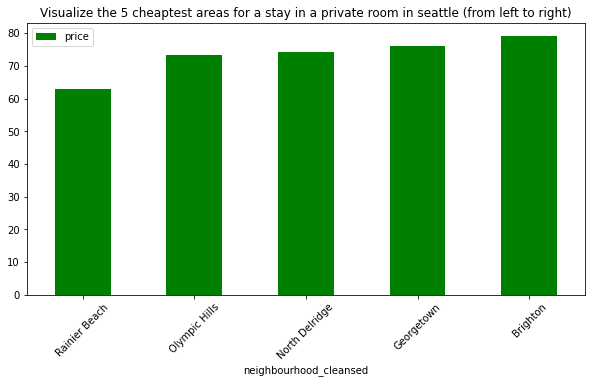

In [178]:
# Visualize the results using barplot
df_listings_selected_copy_plot = df_listings_selected_copy.groupby('neighbourhood_cleansed')[['price']].mean()
df_listings_selected_copy_plot = df_listings_selected_copy_plot.reset_index()
df_listings_selected_copy_plot = df_listings_selected_copy_plot.sort_values(by='price',ascending=True).head(5)
df_listings_selected_copy_plot.plot.bar(x='neighbourhood_cleansed', y='price', color='green', rot=45, figsize = (10,5)).set_title('Visualize the 5 cheaptest areas for a stay in a private room in seattle (from left to right)');

### Question 1: What are the top 5 cheapest area's in general for a stay in seattle?

### Answer:
1. Rainier Beach
2. Olympic Hills
3. North Delridge
4. Georgetown
5. Brighton

### Question 2: What are the top 5 locations's with the best "price-rating-ratio" within the 5 cheapest area's?

In [179]:
# Filter dataset df_listings_selected_copy by list_of_cheap_areas to create new dataset df_listings_selected_copy_cheap_areas
list_of_cheap_areas = ['Rainier Beach','Olympic Hills','North Delridge','Georgetown','Brighton']
df_listings_selected_copy_cheap_areas = df_listings_selected_copy[df_listings_selected_copy['neighbourhood_cleansed'].isin(list_of_cheap_areas)] 
df_listings_selected_copy_cheap_areas

,id,neighbourhood_cleansed,price,review_scores_rating
2145,7362757,Brighton,84.0,97.0
2147,4639040,Brighton,39.0,98.0
2148,2586350,Brighton,105.0,94.0
2149,6482409,Brighton,105.0,97.0
2151,8409975,Brighton,34.0,93.0
...,...,...,...,...
3482,9508837,Georgetown,99.0,100.0
3483,226677,Georgetown,70.0,93.0
3484,7256122,Georgetown,65.0,96.0
3485,6765354,Georgetown,90.0,92.0


In [180]:
# Normalize column price and review_scores rating to calculate comparable price-rating-ratio
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_listings_selected_copy_cheap_areas[['price','review_scores_rating']])
df_listings_selected_copy_cheap_areas[['price','review_scores_rating']] = scaler.fit_transform(df_listings_selected_copy_cheap_areas[['price','review_scores_rating']])
df_listings_selected_copy_cheap_areas['price_rating_ratio'] = df_listings_selected_copy_cheap_areas['price'] / df_listings_selected_copy_cheap_areas['review_scores_rating']
df_listings_selected_copy_cheap_areas.sort_values('price_rating_ratio', ascending=True)

<ipython-input-180-3181774381dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings_selected_copy_cheap_areas[['price','review_scores_rating']] = scaler.fit_transform(df_listings_selected_copy_cheap_areas[['price','review_scores_rating']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-180-3181774381dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,id,neighbourhood_cleansed,price,review_scores_rating,price_rating_ratio
2151,8409975,Brighton,0.000000,0.708333,0.000000
3094,8921924,Olympic Hills,0.004854,1.000000,0.004854
2368,9849122,North Delridge,0.004854,1.000000,0.004854
2197,7902382,Rainier Beach,0.004854,0.791667,0.006132
2152,8409926,Brighton,0.004854,0.666667,0.007282
...,...,...,...,...,...
3104,6813623,Olympic Hills,1.000000,1.000000,1.000000
2201,4711069,Rainier Beach,0.655340,0.625000,1.048544
3107,4951079,Olympic Hills,0.184466,0.166667,1.106796
2395,8555304,North Delridge,0.247573,0.166667,1.485437


In [181]:
# Rename column as preparation for merge process
df_listings_selected_copy_cheap_areas.rename(columns = {'id':'listing_id'}, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [200]:
# Calculte nr of comments per listing id (=location)
df_count_review_comments = df_reviews.groupby('listing_id')[['comments']].count()
df_count_review_comments = df_count_review_comments.reset_index()
df_count_review_comments.sort_values('comments', ascending=False).head(5)

,listing_id,comments
104,208356,474
162,365550,466
28,25002,404
35,47196,353
48,63308,320


In [194]:
# Merge df_count_review_comments & df_listings_selected_copy_cheap_areas
df_results = pd.merge(df_listings_selected_copy_cheap_areas, df_count_review_comments, how="inner", on=["listing_id"])
# Filter price-rating _ration greater 0, because 0 makes no sense
df_results = df_results[df_results['price_rating_ratio']>0]
# Filter nr of comments greater or equal 10, because we want to trust in numbers
df_results = df_results[df_results['comments']>=10]
# Show best locations based on listing_id with best price-rating-ration and nr of comments >= 10
df_results.sort_values('price_rating_ratio', ascending=True).head(5)

,listing_id,neighbourhood_cleansed,price,review_scores_rating,price_rating_ratio,comments
11,7902382,Rainier Beach,0.004854,0.791667,0.006132,16
5,8409926,Brighton,0.004854,0.666667,0.007282,15
19,7902068,Rainier Beach,0.004854,0.583333,0.008322,16
21,7902268,Rainier Beach,0.014563,0.916667,0.015887,12
1,4639040,Brighton,0.024272,0.916667,0.026478,12


In [195]:
# Show shape of final dataset
df_results.shape

(52, 6)

### Question 2: What are the top 5 location's with the best "price-rating-ratio" within the 5 cheapest area's?

### Answer:
1. 7902382
2. 8409926
3. 7902068
4. 7902268
5. 4639040

##### Further analysis to look into comments in details

In [226]:
# Filter dataset df_listings_selected_copy by list_of_cheap_areas to create new dataset df_listings_selected_copy_cheap_areas
list_of_cheap_locations = [7902382, 8409926, 7902068, 7902268, 4639040]
df_location_result = df_reviews[df_reviews['listing_id'].isin(list_of_cheap_locations)] 
df_location_result.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
12134,8409926,47602219,2015-09-20,17255757,Kaylene,This was an overall good first AirBNB experien...
12135,8409926,49826401,2015-10-06,9932372,John And Karolina,Everything as advertised. Five stars.
12136,8409926,49957123,2015-10-07,6909364,Arpith,Beautiful and clean home. Nice and quiet locat...
12137,8409926,50555698,2015-10-12,45013290,Nikola,I spend 3 nights with my 2 children in the Fam...
12138,8409926,50736504,2015-10-13,14572243,Stephanie,Was quick and easy to book. Lots of amenities ...


<AxesSubplot:xlabel='price_rating_ratio', ylabel='Count'>

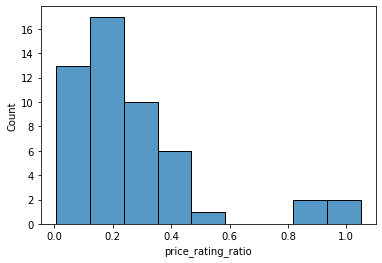

In [228]:
# Plot histogramm to analyse distribution of column price-rating-ratio

# Replace infinite updated data with nan
df_results["price_rating_ratio"].replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN
df_results.dropna(inplace=True)
# Plot histogram
sns.histplot(data=df_results, x="price_rating_ratio")

In [231]:
# Show results
df_results.head(2)

,listing_id,neighbourhood_cleansed,price,review_scores_rating,price_rating_ratio,comments,bin_section
0,7362757,Brighton,0.242718,0.875000,0.277393,52,"(0.25, 0.3]"
1,4639040,Brighton,0.024272,0.916667,0.026478,12,"(0.0, 0.05]"


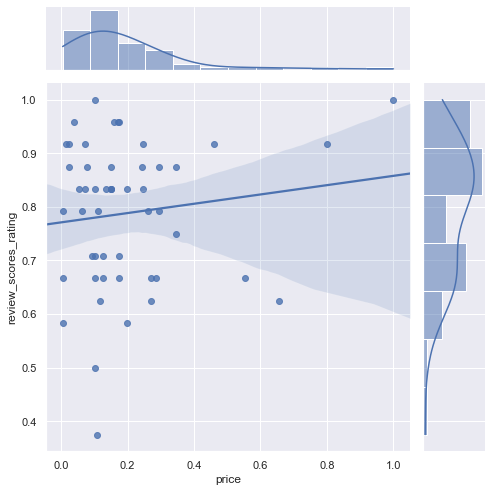

In [234]:
# Analyze relationship between price and review_scores_rating = no relationship 
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="price", y="review_scores_rating", data=df_results,
                  kind="reg", truncate=False,
                  color="b", height=7)

In [229]:
# Create a list with all comments
list_of_comments = df_location_result['comments'].tolist()
list_of_comments

['This was an overall good first AirBNB experience. This bed is kind of like sleeping on a boxspring but the price was right and overall I cannot complain. One of the other rooms had a far more comfy bed from what another guest told me. 5 stars!',
 'Everything as advertised. Five stars. ',
 'Beautiful and clean home. Nice and quiet location. Easy process. ',
 "I spend 3 nights with my 2 children in the Family Room of Dario's house in September due to a visit to Seattle (actually Alessandro was our host at the time we were there). The house is located in a nice and quiet neighborhood. Transportation to downtown Seattle is easily available. The drive frome the airport was not long. The room was very clean and tidy and the  bed very comfortable. We had our separate bathroom with this Family room, which was nice, too. We shared a kitchen, dining room and living room with the other guests, who stayed at the house. All very clean and tidy. The ingredients for breakfast were amazing. We were 

## 4. Modeling
In the fourth chapter **modeling** I use a simple decision tree as base to figure out the most influencing factors for price-rating ratio

In [300]:
# Show content of dataset
df_listings.head()

,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f
1,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t
2,17,220,2016-01-04,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,f,f
3,0,143,2016-01-04,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,WASHINGTON,f,flexible,f,f
4,90,365,2016-01-04,38,2012-07-10,2015-10-24,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,NaN,WASHINGTON,f,strict,f,f


In [313]:
# Select features for dataset df_models as basis
df_model = df_listings[['host_response_time','host_is_superhost','host_has_profile_pic','host_identity_verified',
                        'neighbourhood_cleansed','is_location_exact','property_type','bed_type',
                        'instant_bookable','cancellation_policy',
                        
                        'host_response_rate','host_acceptance_rate','host_listings_count','accommodates','bathrooms','beds',
                        'price','review_scores_rating','guests_included','minimum_nights','maximum_nights']]
df_model.iloc[:,:]

,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,bed_type,instant_bookable,cancellation_policy,...,host_acceptance_rate,host_listings_count,accommodates,bathrooms,beds,price,review_scores_rating,guests_included,minimum_nights,maximum_nights
0,within a few hours,f,t,t,West Queen Anne,t,Apartment,Real Bed,f,moderate,...,100%,3.0,4,1.0,1.0,$85.00,95.0,2,1,365
1,within an hour,t,t,t,West Queen Anne,t,Apartment,Real Bed,f,strict,...,100%,6.0,4,1.0,1.0,$150.00,96.0,1,2,90
2,within a few hours,f,t,t,West Queen Anne,t,House,Real Bed,f,strict,...,100%,2.0,11,4.5,7.0,$975.00,97.0,10,4,30
3,NaN,f,t,t,West Queen Anne,t,Apartment,Real Bed,f,flexible,...,NaN,1.0,3,1.0,2.0,$100.00,NaN,1,1,1125
4,within an hour,f,t,t,West Queen Anne,t,House,Real Bed,f,strict,...,NaN,2.0,6,2.0,3.0,$450.00,92.0,6,1,1125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,within a few hours,f,t,t,Fremont,t,House,Real Bed,f,strict,...,100%,354.0,6,2.0,3.0,$359.00,80.0,1,3,1125
3814,within an hour,f,t,t,Portage Bay,t,Apartment,Real Bed,f,moderate,...,100%,1.0,4,1.0,2.0,$79.00,100.0,3,2,29
3815,NaN,f,t,f,Rainier Beach,f,House,Real Bed,f,moderate,...,NaN,1.0,2,1.0,1.0,$93.00,NaN,2,1,7
3816,within an hour,f,t,t,Madison Park,f,Condominium,Real Bed,f,moderate,...,NaN,1.0,2,1.0,1.0,$99.00,NaN,1,3,1125


In [314]:
# Drop all elements where values are missing
df_model = df_model.dropna()

In [315]:
# Clean the column price, cut off dolar sign. Otherwise it is not possible to calcuate mean price per zipcode
df_model['price'] = df_model['price'].replace('[\$,]', '', regex=True).astype(float)
df_model['host_response_rate'] = df_model['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
df_model['host_acceptance_rate'] = df_model['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)

<ipython-input-315-eac0521ab706>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['price'] = df_model['price'].replace('[\$,]', '', regex=True).astype(float)
<ipython-input-315-eac0521ab706>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['host_response_rate'] = df_model['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
<ipython-input-315-eac0521ab706>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [316]:
# Create new column
df_model['price_rating_ratio'] = df_model['price'] / df_model['review_scores_rating']

<ipython-input-316-81768df64fb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['price_rating_ratio'] = df_model['price'] / df_model['review_scores_rating']


In [318]:
# Normalize numeric features to secure comparability between features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_model[['host_response_rate','host_acceptance_rate','host_listings_count','accommodates','bathrooms','beds',
                        'price','review_scores_rating','guests_included','minimum_nights','maximum_nights','price_rating_ratio']])
df_model[['host_response_rate','host_acceptance_rate','host_listings_count','accommodates','bathrooms','beds',
                        'price','review_scores_rating','guests_included','minimum_nights','maximum_nights','price_rating_ratio']] = scaler.fit_transform(df_model[['host_response_rate','host_acceptance_rate','host_listings_count','accommodates','bathrooms','beds',
                        'price','review_scores_rating','guests_included','minimum_nights','maximum_nights','price_rating_ratio']])
df_model

<ipython-input-318-09b2aa9ea0ca>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[['host_response_rate','host_acceptance_rate','host_listings_count','accommodates','bathrooms','beds',
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,bed_type,instant_bookable,cancellation_policy,...,host_listings_count,accommodates,bathrooms,beds,price,review_scores_rating,guests_included,minimum_nights,maximum_nights,price_rating_ratio
0,within a few hours,f,t,t,West Queen Anne,t,Apartment,Real Bed,f,moderate,...,0.003992,0.200000,0.1250,0.000000,0.064483,0.9375,0.153846,0.000000,0.323843,0.064831
1,within an hour,t,t,t,West Queen Anne,t,Apartment,Real Bed,f,strict,...,0.009980,0.200000,0.1250,0.000000,0.131013,0.9500,0.076923,0.001001,0.079181,0.128992
2,within a few hours,f,t,t,West Queen Anne,t,House,Real Bed,f,strict,...,0.001996,0.666667,0.5625,0.428571,0.975435,0.9625,0.769231,0.003003,0.025801,0.944645
6,within an hour,t,t,t,West Queen Anne,t,House,Real Bed,f,moderate,...,0.000000,0.066667,0.1250,0.000000,0.059365,0.9875,0.076923,0.002002,0.011566,0.056505
7,within an hour,t,t,t,West Queen Anne,t,Cabin,Real Bed,f,strict,...,0.007984,0.066667,0.1250,0.000000,0.038895,0.9625,0.076923,0.001001,0.005338,0.038295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3810,within an hour,f,t,t,Fremont,t,House,Real Bed,f,strict,...,0.000000,0.266667,0.1250,0.142857,0.135107,0.9000,0.307692,0.001001,0.011566,0.139696
3811,within a few hours,f,t,t,Fremont,t,Apartment,Real Bed,f,moderate,...,0.000000,0.133333,0.1250,0.000000,0.044012,1.0000,0.076923,0.000000,1.000000,0.041316
3812,within an hour,t,t,t,Fremont,t,Apartment,Real Bed,t,moderate,...,0.003992,0.200000,0.1250,0.071429,0.074719,0.9500,0.153846,0.002002,0.323843,0.073944
3813,within a few hours,f,t,t,Fremont,t,House,Real Bed,f,strict,...,0.704591,0.333333,0.2500,0.142857,0.344933,0.7500,0.076923,0.002002,1.000000,0.410035


In [319]:
# Show shape of dataset
df_model.shape

(2666, 22)

In [335]:
# Encode the remaining categorical feature 
for categorical_feature in ['host_response_time','host_is_superhost','host_has_profile_pic','host_identity_verified',
                        'neighbourhood_cleansed','is_location_exact','property_type','bed_type',
                        'instant_bookable','cancellation_policy']:
    df_model = pd.concat([df_model, pd.get_dummies(df_model[categorical_feature])], axis=1)
    
# Drop features
df_model.drop(['host_response_time','host_is_superhost','host_has_profile_pic','host_identity_verified',
                       'neighbourhood_cleansed','is_location_exact','property_type','bed_type',
                       'instant_bookable','cancellation_policy'], axis=1, inplace=True)

In [338]:
# Last check if there are any missing values in the encoded dataset
sum(df_model.isnull().sum())

0

In [353]:
# Shuffle data around
df_model = shuffle(df_model)

X = df_model.drop(['price_rating_ratio','price','review_scores_rating'], axis=1)
y = df_model['price_rating_ratio']

# Split the data into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [354]:
# Control shape after splits
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2132, 384)
(534, 384)
(2132,)
(534,)


In [375]:
# Define random forest
model = RandomForestRegressor(max_depth=100, n_estimators=100, criterion='mse', random_state=42)
model

RandomForestRegressor(max_depth=100, random_state=42)

In [376]:
# Fit model using training data
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, random_state=42)

In [370]:
# Predict results using test data
y_pred = model.predict(X_test)
y_pred

array([0.05429968, 0.03315466, 0.17151846, 0.06573538, 0.10547029,
       0.17702228, 0.19299708, 0.08944075, 0.02625937, 0.0621696 ,
       0.04250442, 0.05155966, 0.15108022, 0.22061924, 0.24185843,
       0.10089301, 0.09204566, 0.05292874, 0.07984522, 0.04476696,
       0.04351256, 0.10911655, 0.0964285 , 0.09809648, 0.07823584,
       0.02540159, 0.04267469, 0.05057298, 0.02608505, 0.09518811,
       0.06664415, 0.0855284 , 0.09175159, 0.33277505, 0.11435205,
       0.06936102, 0.16336915, 0.06086102, 0.19013784, 0.0649583 ,
       0.14464831, 0.09062347, 0.05448591, 0.13445666, 0.16524369,
       0.32926767, 0.11203885, 0.05278444, 0.09111109, 0.0694965 ,
       0.0633667 , 0.03618073, 0.05702583, 0.11526662, 0.11931374,
       0.10928415, 0.12928198, 0.16339499, 0.08243341, 0.13513932,
       0.10855298, 0.11526662, 0.07457467, 0.11170714, 0.35767345,
       0.05829857, 0.02617963, 0.19996033, 0.09650732, 0.02081434,
       0.08317737, 0.10220798, 0.07697528, 0.08245137, 0.07726

## 5. Evaluation
In the fifth chapter **evaluation** I try to visualite the top 5 most influencing factors for price-rating-ratio

### Question 3: What are the top 5 factors influencing the "price-rating-ratio"?

In [387]:
# Compare training and testing results

# Training result
print("training result:")
print("r_2:", round(model.score(X_train, y_train) ,2))

# Testing result
print("\ntesting result:")
print("r_2:", round(model.score(X_test, y_test), 2))

training result:
r_2: 0.93

testing result:
r_2: 0.59


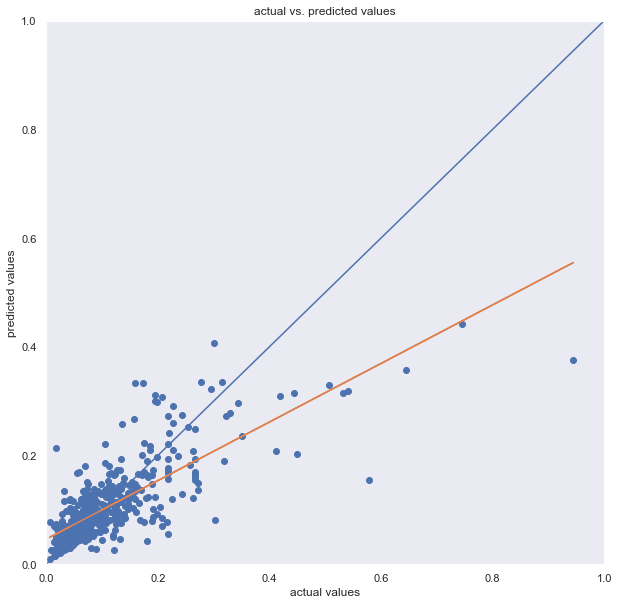

In [388]:
# Scatterplot of actual(=test data) vs. predicted(=prediction) values
plt.figure(figsize=(10, 10))
plt.grid()
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.plot([0,1],[0,1])
plt.scatter(y_test, y_pred, alpha=1)
coef = np.polyfit(y_test, y_pred, 1)
poly_1D = np.poly1d(coef) 
plt.plot(y_test, poly_1D(y_test))
plt.title('actual vs. predicted values');
plt.xlabel("actual values")
plt.ylabel("predicted values")
plt.show()

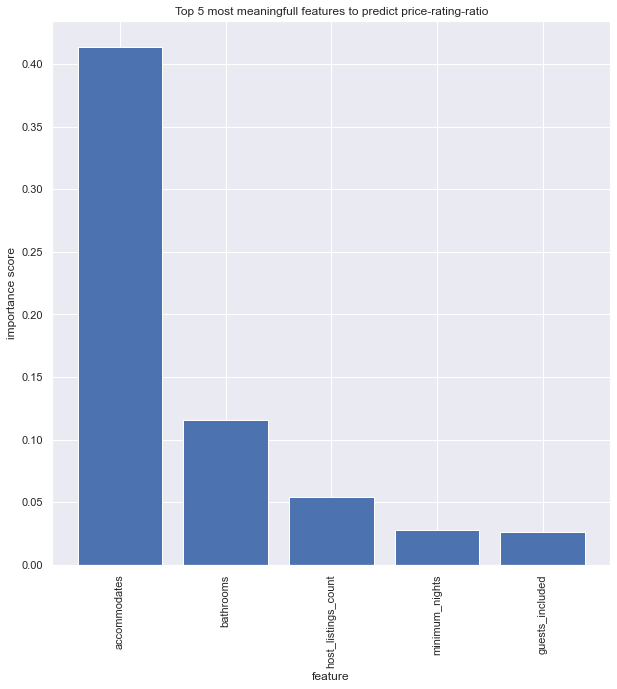

In [389]:
# Calculate importance of input features
importances = model.feature_importances_
    
values = sorted(zip(X_train.columns, model.feature_importances_), key=lambda x: x[1] * -1)
feature_importances = pd.DataFrame(values, columns = ["feature", "score"])
feature_importances = feature_importances.sort_values(by = ['score'], ascending = False)

features = feature_importances['feature'][:5]
y_feature = np.arange(len(features))
score = feature_importances['score'][:5]

# Plot the importance of a feature to the price
plt.figure(figsize=(10,10));
plt.bar(y_feature, score, align='center');
plt.xticks(y_feature, features, rotation='vertical');
plt.xlabel('feature');
plt.ylabel('importance score');
plt.title('Top 5 most meaningfull features to predict price-rating-ratio');

### Question 3: What are the top 5 factors influencing the "price-rating-ratio"?

### Answer:
1. accommodates
2. bathrooms
3. host_listings_count
4. minimum_nights
5. guests_included

## 6. Deployment
I use the last chapter **deployment** to summarize the key findings because it is not planned to deploy the machine learning modell in practice. 

## Summary

### Question 1: What are the top 5 cheapest area's in general for a stay in seattle?
### Answer:
1. Rainier Beach
2. Olympic Hills
3. North Delridge
4. Georgetown
5. Brighton

### Question 2: What are the top 5 location's with the best "price-rating-ratio" within the 5 cheapest area's?
### Answer:
1. 7902382
2. 8409926
3. 7902068
4. 7902268
5. 4639040

### Question 3: What are the top 5 factors influencing the "price-rating-ratio"?
### Answer:
1. accommodates
2. bathrooms
3. host_listings_count
4. minimum_nights
5. guests_included